In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_dir = "../data"
od_dir = os.path.join(data_dir, "OD_PT")
#os.listdir(od_dir)

In [4]:

months = ["201911", "202001"] #"201912"
for m in months:
    df_merge = None
    for hr in range(5,24):
        print(hr)
        f = "OD_{}_weekday_{}.csv.xz".format(m, str(hr).zfill(2))
        fp = os.path.join(od_dir, f)
        print(fp)
        df_flow = pd.read_csv(fp, index_col=0)
        df_flow = df_flow[["origin", "destination", "total_flow"]]
        df_flow = df_flow.rename(columns={"total_flow": "hour_{}".format(str(hr).zfill(2))})
        #print(df_flow.head())

        if df_merge is None:
            df_merge = df_flow
        else:
            df_merge = pd.merge(df_merge, df_flow, left_on=["origin", "destination"], right_on=["origin", "destination"], 
                               how="outer", suffixes=('_o', '_n'), validate="one_to_one")
        #break
    colval = { col:0 for col in df_merge.columns if col not in ["origin", "destination"]}
    df_merge = df_merge.fillna(value=colval)
    print(df_merge.head())
    df_merge.to_csv(os.path.join(data_dir, "OD_{}_weekday.csv.xz".format(m)), index_label="ind", compression="xz")

5
../data/OD_PT/OD_201911_weekday_05.csv.xz
6
../data/OD_PT/OD_201911_weekday_06.csv.xz
7
../data/OD_PT/OD_201911_weekday_07.csv.xz
8
../data/OD_PT/OD_201911_weekday_08.csv.xz
9
../data/OD_PT/OD_201911_weekday_09.csv.xz
10
../data/OD_PT/OD_201911_weekday_10.csv.xz
11
../data/OD_PT/OD_201911_weekday_11.csv.xz
12
../data/OD_PT/OD_201911_weekday_12.csv.xz
13
../data/OD_PT/OD_201911_weekday_13.csv.xz
14
../data/OD_PT/OD_201911_weekday_14.csv.xz
15
../data/OD_PT/OD_201911_weekday_15.csv.xz
16
../data/OD_PT/OD_201911_weekday_16.csv.xz
17
../data/OD_PT/OD_201911_weekday_17.csv.xz
18
../data/OD_PT/OD_201911_weekday_18.csv.xz
19
../data/OD_PT/OD_201911_weekday_19.csv.xz
20
../data/OD_PT/OD_201911_weekday_20.csv.xz
21
../data/OD_PT/OD_201911_weekday_21.csv.xz
22
../data/OD_PT/OD_201911_weekday_22.csv.xz
23
../data/OD_PT/OD_201911_weekday_23.csv.xz
           origin      destination  hour_05  hour_06  hour_07  hour_08  \
0   TEBAN GARDENS       WEST COAST   3276.0  11430.0  17406.0  18270.0   
1 

In [5]:

months = ["201911", "202001"] #"201912"
for m in months:
    df_merge = None
    for hr in range(5,24):
        print(hr)
        f = "OD_{}_weekend_{}.csv.xz".format(m, str(hr).zfill(2))
        fp = os.path.join(od_dir, f)
        df_flow = pd.read_csv(fp, index_col=0)
        df_flow = df_flow[["origin", "destination", "total_flow"]]
        df_flow = df_flow.rename(columns={"total_flow": "hour_{}".format(str(hr).zfill(2))})
        #print(df_flow.head())

        if df_merge is None:
            df_merge = df_flow
        else:
            df_merge = pd.merge(df_merge, df_flow, left_on=["origin", "destination"], right_on=["origin", "destination"], 
                               how="outer", suffixes=('_o', '_n'))#, validate="one_to_one")
        #break
    colval = { col:0 for col in df_merge.columns if col not in ["origin", "destination"]}
    df_merge = df_merge.fillna(value=colval)
    print(df_merge.head())
    df_merge.to_csv(os.path.join(data_dir, "OD_{}_weekend.csv.xz".format(m)), index_label="ind", compression="xz")

5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
             origin      destination  hour_05  hour_06  hour_07  hour_08  \
0     TEBAN GARDENS       WEST COAST    342.0   1800.0   2808.0   2124.0   
1      GEYLANG EAST     PEARL'S HILL    144.0    504.0    432.0    594.0   
2           MIDVIEW  WOODLANDS SOUTH    306.0   1314.0   3426.0   3420.0   
3        MACPHERSON         ALJUNIED   3250.0  17309.0  27407.0  35118.0   
4  CLEMENTI CENTRAL  MARITIME SQUARE    882.0   3348.0   3906.0   5094.0   

   hour_09  hour_10  hour_11  hour_12  ...  hour_14  hour_15  hour_16  \
0    828.0    846.0    612.0    864.0  ...    396.0    432.0    216.0   
1    846.0    522.0    792.0    918.0  ...    756.0   1098.0    540.0   
2   5004.0   4986.0   4770.0   4008.0  ...   3264.0   3936.0   2808.0   
3  35317.0  29313.0  29716.0  33612.0  ...  27130.0  25235.0  27661.0   
4   5724.0   6120.0   6030.0   6660.0  ...   5634.0   5814.0   6354.0   

   hour_17  hour_18  hour_19  hour_20  hour_21  hour

In [15]:
cormat = df_merge.corr(method ='pearson').as_matrix()

/home/benny/.pyenv/versions/miniconda3-4.3.30/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


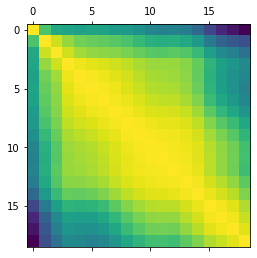

In [17]:
plt.matshow(cormat)

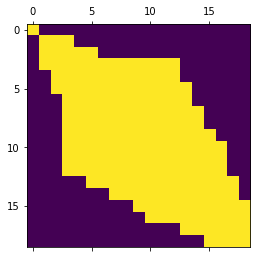

In [25]:
plt.matshow(np.where(cormat>=0.92, 1, 0))